In [1]:
from google.colab import files
uploaded = files.upload()

Saving India_Confirmed_Cases_21.csv to India_Confirmed_Cases_21.csv


In [2]:
import pandas as pd
df = pd.read_csv("India_Confirmed_Cases_21.csv")
df.head()

,Date,Confirm
0,1/1/21,10325823
1,1/2/21,10323965
2,1/3/21,10340469
3,1/4/21,10356844
4,1/5/21,10374932


In [3]:
confirmed_cases = df['Confirm']

In [4]:
data = df.filter(['Confirm'])

In [5]:
dataset = data.values

In [8]:
import math
training_data_len = math.ceil(len(dataset) * 0.7)
training_data_len

189

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [11]:
scaled_data

array([[7.95553089e-05],
       [0.00000000e+00],
       [7.06663519e-04],
       [1.40780355e-03],
       [2.18229033e-03],
       [3.05345950e-03],
       [3.83012998e-03],
       [3.83012998e-03],
       [5.40869057e-03],
       [6.10709027e-03],
       [6.64590835e-03],
       [7.32962158e-03],
       [8.05521053e-03],
       [8.72273866e-03],
       [9.37176954e-03],
       [1.00202010e-02],
       [1.06105716e-02],
       [1.10408896e-02],
       [1.16324591e-02],
       [1.22851723e-02],
       [1.29079559e-02],
       [1.35183652e-02],
       [1.41541654e-02],
       [1.47194877e-02],
       [1.51092145e-02],
       [1.56525284e-02],
       [1.61520399e-02],
       [1.69593678e-02],
       [1.75195091e-02],
       [1.80780234e-02],
       [1.85676867e-02],
       [1.89374177e-02],
       [1.94100824e-02],
       [1.99623881e-02],
       [2.04936702e-02],
       [2.09951941e-02],
       [2.15115329e-02],
       [2.20181092e-02],
       [2.24081786e-02],
       [2.28820422e-02],


In [12]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(10, len(train_data)):
  x_train.append(train_data[i-10:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 10:
    print(x_train)
    print(y_train)
    print()

[array([7.95553089e-05, 0.00000000e+00, 7.06663519e-04, 1.40780355e-03,
       2.18229033e-03, 3.05345950e-03, 3.83012998e-03, 3.83012998e-03,
       5.40869057e-03, 6.10709027e-03])]
[0.0066459083544249675]



In [14]:
import numpy as np
x_train, y_train = np.array(x_train), np.array(y_train)

In [15]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(179, 10, 1)

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.recurrent import LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [19]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [20]:
model.fit(x_train,y_train,batch_size=1, epochs=50)

Epoch 1/50
179/179 [==============================] - 6s 14ms/step - loss: 0.0096
Epoch 2/50
179/179 [==============================] - 2s 14ms/step - loss: 4.9568e-04
Epoch 3/50
179/179 [==============================] - 2s 13ms/step - loss: 1.4838e-04
Epoch 4/50
179/179 [==============================] - 2s 14ms/step - loss: 1.8019e-04
Epoch 5/50
179/179 [==============================] - 2s 14ms/step - loss: 6.1677e-04
Epoch 6/50
179/179 [==============================] - 3s 14ms/step - loss: 9.3730e-05
Epoch 7/50
179/179 [==============================] - 2s 14ms/step - loss: 1.7403e-04
Epoch 8/50
179/179 [==============================] - 2s 14ms/step - loss: 2.9274e-04
Epoch 9/50
179/179 [==============================] - 2s 14ms/step - loss: 0.0035
Epoch 10/50
179/179 [==============================] - 2s 14ms/step - loss: 4.4240e-05
Epoch 11/50
179/179 [==============================] - 3s 15ms/step - loss: 4.8566e-05
Epoch 12/50
179/179 [==============================] - 2s 14

In [21]:
test_data = scaled_data[training_data_len-10: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(10, len(test_data)):
  x_test.append(test_data[i-10:i, 0])

In [22]:
len(test_data)

90

In [23]:
x_test = np.array(x_test)

In [24]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [25]:
x_test

array([[[0.85801912],
        [0.86010803],
        [0.86210406],
        [0.86399279],
        [0.86583699],
        [0.86754097],
        [0.86902687],
        [0.87089942],
        [0.87286441],
        [0.8747224 ]],

       [[0.86010803],
        [0.86210406],
        [0.86399279],
        [0.86583699],
        [0.86754097],
        [0.86902687],
        [0.87089942],
        [0.87286441],
        [0.8747224 ],
        [0.87655354]],

       [[0.86210406],
        [0.86399279],
        [0.86583699],
        [0.86754097],
        [0.86902687],
        [0.87089942],
        [0.87286441],
        [0.8747224 ],
        [0.87655354],
        [0.87833073]],

       [[0.86399279],
        [0.86583699],
        [0.86754097],
        [0.86902687],
        [0.87089942],
        [0.87286441],
        [0.8747224 ],
        [0.87655354],
        [0.87833073],
        [0.87992158]],

       [[0.86583699],
        [0.86754097],
        [0.86902687],
        [0.87089942],
        [0.87286441],
  

In [26]:
len(x_test)

80

In [27]:
len(x_train)

179

In [28]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [29]:
predictions

array([[31021332.],
       [31051406.],
       [31081196.],
       [31110268.],
       [31138180.],
       [31165596.],
       [31193104.],
       [31220624.],
       [31247856.],
       [31275086.],
       [31302134.],
       [31328116.],
       [31354212.],
       [31380696.],
       [31407024.],
       [31429218.],
       [31455074.],
       [31481938.],
       [31508126.],
       [31534636.],
       [31561698.],
       [31589504.],
       [31617476.],
       [31645526.],
       [31673540.],
       [31701092.],
       [31727762.],
       [31754734.],
       [31782402.],
       [31809850.],
       [31837002.],
       [31863476.],
       [31888564.],
       [31913286.],
       [31938254.],
       [31963656.],
       [31989072.],
       [32014190.],
       [32038610.],
       [32061642.],
       [32084264.],
       [32106952.],
       [32129948.],
       [32152862.],
       [32175248.],
       [32196506.],
       [32216670.],
       [32237156.],
       [32259176.],
       [32282804.],


In [30]:
len(predictions)

80

In [31]:
rmse = np.sqrt( np.mean( predictions - y_test )**2)
rmse

245971.5875

In [32]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predicted Cases'] = predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


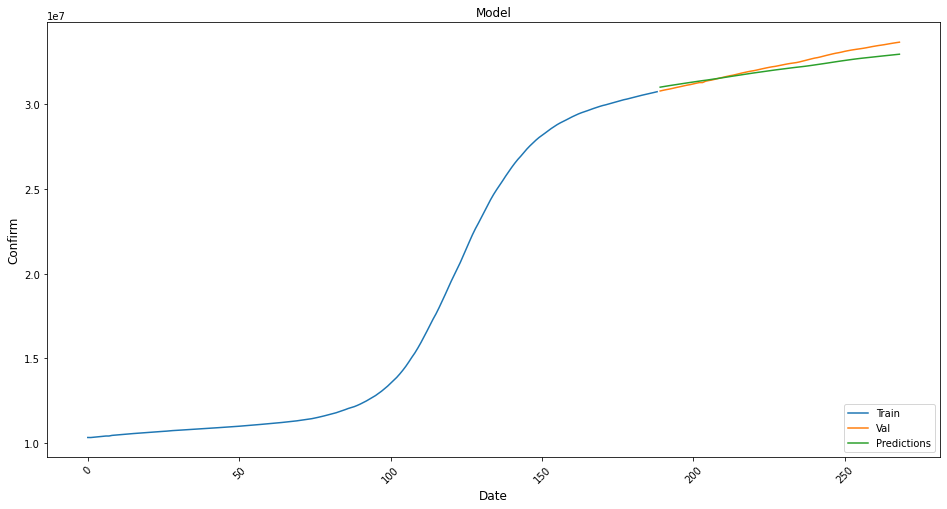

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Confirm', fontsize=12)
plt.plot(train['Confirm'])
plt.plot(valid[['Confirm', 'Predicted Cases']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
#plt.savefig('/content/drive/My Drive/figzero.png', dpi=300)
plt.show()

In [40]:
valid

,Confirm,Predicted Cases
189,30795716,31021332.0
190,30837222,31051406.0
191,30874376,31081196.0
192,30907282,31110268.0
193,30946147,31138180.0
...,...,...
264,33563421,32893040.0
265,33594803,32911674.0
266,33624419,32930520.0
267,33652745,32949374.0


In [41]:
len(valid)

80

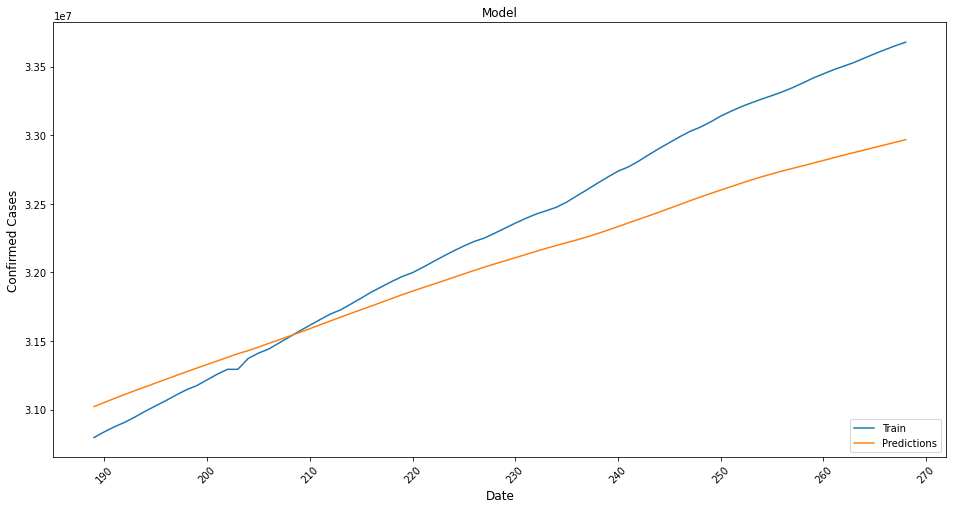

In [42]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Confirmed Cases', fontsize=12)
plt.plot(valid)
plt.legend(['Train', 'Predictions'], loc='lower right')
#plt.savefig('/content/drive/My Drive/figone.png', dpi=300)
plt.show()

In [44]:
from sklearn.metrics import r2_score
score = r2_score(valid['Confirm'], valid['Predicted Cases'])
print(score)

0.80809325878337
